# Homework 5: Calculus and Linear Algebra in Python

** Submit this notebook to bCourses to receive a credit for this assignment.**

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook name_HW05.ipynb.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import scipy.integrate as scint

%matplotlib inline


# Problem 1: Numerical Differentiation

In [5]:
def forward_dy(y, x):
    '''
        Uses forward differences (see below) to estimate the derivatives at each value of x, 
        except for the last one. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i]) /  (x[i+1] - x[i])
    '''
    dyf = [0.0]*len(x)
    for i in range(len(y)-1):
        dyf[i] = (y[i+1] - y[i])/(x[i+1]-x[i])
    
    #set last element by backwards difference
    dyf[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])
    return dyf

def backward_dy(y, x):
    '''
        Uses backward differences (see below) to estimate the derivatives at each value of x, 
        except for the first one. The derivative at the first value of x is estimated 
        using a forward difference.
            dy/dx at x[i] is approximated by (y[i] - y[i-1]) /  (x[i] - x[i-1])
    '''
    
    dyb = [0.0]*len(x)
    #set first element by forward difference
    dyb[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)):
        dyb[i] = (y[i] - y[i-1])/(x[i]-x[i-1])

    return dyb

def centered_dy(y, x):
    '''
        Uses centered differences (see below) to estimate the derivatives at each value of x, 
        except for the first and last values. The derivative at the first value of x is estimated 
        using a forward difference. The derivative at the last value of x is estimated 
        using a backward difference.
            dy/dx at x[i] is approximated by (y[i+1] - y[i-1]) / (x[i+1]-x[i-1])
    '''
    dyc = [0.0]*len(x)
    dyc[0] = (y[0] - y[1])/(x[0] - x[1])
    for i in range(1,len(y)-1):
        dyc[i] = (y[i+1] - y[i-1])/(x[i+1]-x[i-1])
    dyc[-1] = (y[-1] - y[-2])/(x[-1] - x[-2])

    return dyc

1a) Use the functions above to estimate the $f'(x)$ in three ways for
$$f(x) = \cos(x)$$
using $N = 100$ points in the window $x\in [0, 2\pi)$. Calculate the analytical derivative at each point as well. Plot the four curves together (forward derivatives, backward derivatives, centered derivatives, and analytical derivatives). If you have done everything right, they should all agree well with each other. You do not need axis labels, but do add a legend to indicate which curve is which.

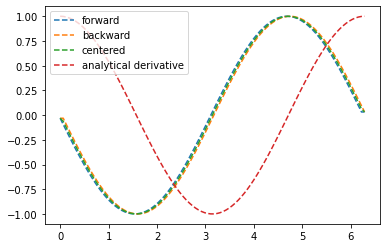

In [20]:
n = 100
x = np.linspace (0,2*np.pi,n)
y = np.cos(x)
dy_analytical = np.cos(x)

plt.figure()
plt.plot(x,forward_dy(y, x),'--',label='forward')
plt.plot(x,backward_dy(y,x),'--',label='backward')
plt.plot(x,centered_dy(y,x),'--',label='centered')
plt.plot(x,dy_analytical,'--',label='analytical derivative')
plt.legend(loc='upper left')


1b) Plot the difference between result from each estimate method and the result from the analytical method. For example, you should compute `dyf - dy_analytical`,`dyb - dy_analytical`, and `dyc - dy_analytical` and plot all three together. You do not need axis labels, but do add a legend to indicate which curve is which. Which method is most accurate? 

1c) Vary the number of points $N$ representing the original function (try $N = 10, 100, 1000$ points). How does the precision change (*Hint: look at the maximum/minimum value of the differences you calculated above*).

# Problem 2: Numerical Integration

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\sin x\, dx $$
1. $$\int_2^7 \frac{1}{x^2}\, dx $$
1. $$\int_1^5 (3x^2+x-4)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) In your submitted work, describe roughly how many points were required, and explain.

In [12]:
#cosx
print('Sub-question A')
def func(x):
    return np.sin(x)

n=20
x = np.linspace(0, np.pi*0.5, n)
y = func(x)

quad_ans = scint.quad(func, 0, np.pi*0.5)
trapz_ans = scint.trapz(y, x)
simps_ans = scint.simps(y, x)


print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('20 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy by a large margin')

print('Sub-question B')
def func(x):
    return 1/(x**2)

n=250
x = np.linspace(2, 7, n)
y = func(x)

quad_ans = scint.quad(func, 2, 7)
trapz_ans = scint.trapz(y, x)
simps_ans = scint.simps(y, x)
print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('250 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy')

print('Sub-question C')
def func(x):
    return 3*x**2 + x - 4

n=200
x = np.linspace(1,5,n)
y = func(x)

quad_ans = scint.quad(func, 1, 5)
trapz_ans = scint.trapz(y, x)
simps_ans = scint.simps(y, x)
print('Quadrature: {}\nTrapezoid: {}\nSimpson: {}'.format(quad_ans[0], trapz_ans, simps_ans))
print('200 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy in the Simpson method')



Sub-question A
Quadrature: 0.9999999999999999
Trapezoid: 0.9994303595982761
Simpson: 0.9999757555048453
20 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy by a large margin
Sub-question B
Quadrature: 0.3571428571428571
Trapezoid: 0.35715106144822883
Simpson: 0.35714298265961064
250 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy
Sub-question C
Quadrature: 120.0
Trapezoid: 120.00080806040252
Simpson: 120.00000406060504
200 Slices should be on the lowest "acceptable" answer, as decreasing it would lower accuracy in the Simpson method


# Problem 3: My Name is Neo

![SegmentLocal](neo.gif "segment")

3a) Store a $3\times 3$ matrix $A$ which is with entries
$$A = \begin{pmatrix}
10 & -7 & 0\\
-3 & 2 & 6\\
5 & -1 & 5\\
\end{pmatrix}$$
Calculate its determinant using the built-in `np.linalg.det` function.

In [16]:
A = np.matrix(([10, -7, 0], [-3,2,6],[5,-1,5]))

A_determinant = np.linalg.det(A)
print('The determinate for Matrix A is', A_determinant)

The determinate for Matrix A is -155.00000000000003


3b) Write your own determinant function `determinant(M)`, which takes a 3x3 matrix `M` as an argument and returns the determinant of that matrix. Test your determinant function on the matrix $A$ above. Does your function agree with the built-in function?

In [23]:
def determinant(M):
    indices = list(range(len(M)))
    if len(A) == 2 and len(A[0]) == 2:
        val = A[0][0] * A[1][1] - A[1][0] * A[0][1]
    for fc in indices: 
        As = A.copy()
        As = As[1:] 
        height = len(As) 
 
        for i in range(height): 
            As[i] = As[i][0:fc] + As[i][fc+1:] 
 
        sign = (-1) ** (fc % 2) # F) 
        sub_det = determinant_recursive(As)
        total += sign * A[0][fc] * sub_det 
 
    return total

determinant(A)

ValueError: could not broadcast input array from shape (0,3) into shape (1,3)

3c) Invert matrix $A$ in the code cell below. Then multiply $A$ by your answer for its inverse Is the product what you expect?

In [26]:
Ainv = np.linalg.inv(A)

product = np.linalg.inv(A).dot(Ainv)
print(product)
print('Yes, I expected the product')

[[ 0.08844953  0.13985432 -0.11363163]
 [ 0.14110302  0.23204995 -0.20104058]
 [-0.05119667 -0.06118626  0.07471384]]
Yes, I expected the product


# Problem 4: Final Project Update

At this point you should be finishing up your research and starting on your presentation, if you haven't already. Report some of your research conclusions here so that I know you will be ready to present next Thursday.